In [142]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from brain_tumor_segmentation import BrainTumorSegmentation
%matplotlib inline

In [18]:
def get_scan_data(scan_num: int, slice_num: int) -> np.array:
    return np.load(f"../Preprocessed/train/{scan_num}/data/{slice_num}.npy")

In [19]:
def get_mask_data(mask_num: int, slice_num: int) -> np.array:
    return np.load(f"../Preprocessed/train/{mask_num}/masks/{slice_num}.npy")

In [49]:
def get_all_scan_data() -> np.array:
    all_slices = []
    dir_names = os.listdir("../Preprocessed/val/")
    sorted_dir_names = sorted(dir_names, key=lambda x: int(x))
    for cur_dir in sorted_dir_names:
        sub_dir_names = os.listdir(f"../Preprocessed/val/{cur_dir}/data")
        sorted_sub_dir_names = sorted(sub_dir_names, key=lambda x: int(x.split(".")[0]))
        for cur_sub_dir in sorted_sub_dir_names:
            full_dir = f"../Preprocessed/val/{cur_dir}/data/{cur_sub_dir}"
            all_slices.append(torch.from_numpy(np.load(full_dir)).unsqueeze(0))
        if int(cur_dir) % 20 == 0:
            print(f"{cur_dir}/{len(sorted_dir_names)}")
    all_slices = torch.cat(all_slices)
    return all_slices
val_data = get_all_scan_data()
val_data.shape

420/73
440/73
460/73
480/73


torch.Size([11315, 4, 240, 240])

In [93]:
def get_all_mask_data() -> np.array:
    all_slices = []
    dir_names = os.listdir("../Preprocessed/val/")
    sorted_dir_names = sorted(dir_names, key=lambda x: int(x))
    for cur_dir in sorted_dir_names:
        sub_dir_names = os.listdir(f"../Preprocessed/val/{cur_dir}/data")
        sorted_sub_dir_names = sorted(sub_dir_names, key=lambda x: int(x.split(".")[0]))
        for cur_sub_dir in sorted_sub_dir_names:
            full_dir = f"../Preprocessed/val/{cur_dir}/masks/{cur_sub_dir}"
            all_slices.append(torch.from_numpy(np.load(full_dir)).unsqueeze(0))
        if int(cur_dir) % 20 == 0:
            print(f"{cur_dir}/{len(sorted_dir_names)}")
    all_slices = torch.cat(all_slices)
    return all_slices
val_masks = get_all_mask_data()
val_masks.shape

420/73
440/73
460/73
480/73


torch.Size([11315, 4, 240, 240])

In [25]:
def plot_image(img_data: np.array, channel: int = 0):
    plt.figure()
    plt.imshow(img_data[0])

In [125]:
def plot_image_grid(img_data: np.array, channel: int = 0, label_list: list[str] = None):
    num_images = len(img_data)
    cur_channel_data = img_data[:, channel, :, :].squeeze()
    fick = plt.figure(figsize=(10, 20))
    if num_images <= 2:
        f, ax = plt.subplots(int(num_images / 2), 2)
        for index in range(num_images):
            ax[index].imshow(cur_channel_data[index])
            if label_list is not None:
                ax[index].set_title(label_list[index])
    else:
        f, ax = plt.subplots(int(num_images / 2), 2)
        for index in range(num_images):
            ax[index // 2, index % 2].imshow(cur_channel_data[index])

<Figure size 1000x2000 with 0 Axes>

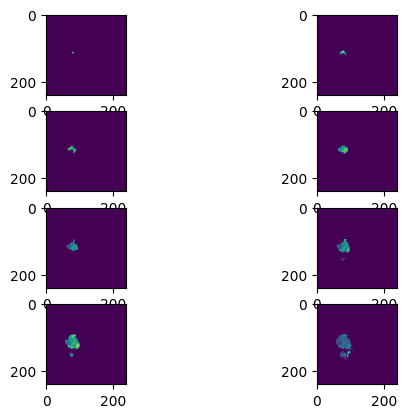

In [126]:
plot_image_grid(val_data[:8], channel=1)

In [ ]:
plot_image(get_scan_data(0, 3), 1)

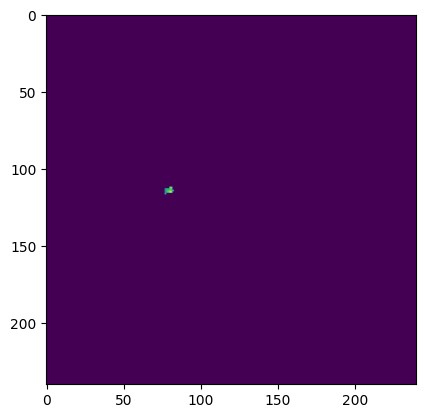

In [92]:
plot_image(val_data[0], 1)

In [129]:
def plot_all_data_for_slice(slice_num: int, channel: int):
    plot_image_grid(torch.cat([val_data[slice_num].unsqueeze(0), val_masks[slice_num].unsqueeze(0)]), channel=channel, label_list=["Scan data", "Mask"])

<Figure size 1000x2000 with 0 Axes>

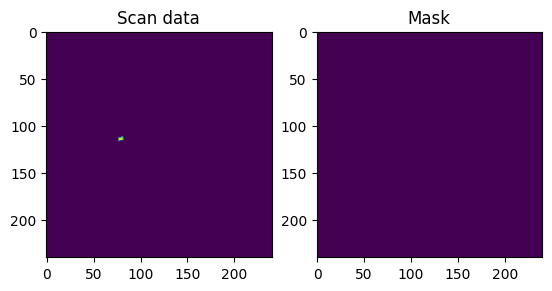

In [128]:
plot_image_grid(torch.cat([val_data[0].unsqueeze(0), val_masks[0].unsqueeze(0)]), channel=1, label_list=["Scan data", "Mask"])

In [130]:
q = plot_all_data_for_slice

<Figure size 1000x2000 with 0 Axes>

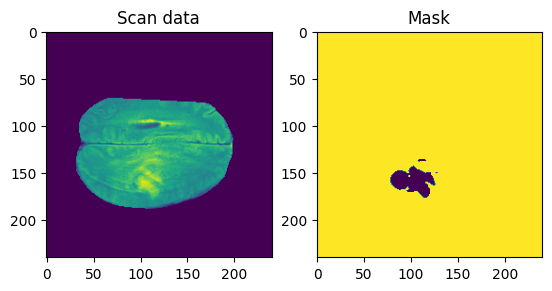

In [139]:
q(100, 0)

In [143]:
checkpoint = "C:/Users/denni/Documents/fallstudie-ss2024/Segmentation/src/logs/lightning_logs/version_105/checkpoints/epoch=9-step=39820.ckpt"
model: BrainTumorSegmentation = BrainTumorSegmentation.load_from_checkpoint(checkpoint,
                        in_channels=4, out_channels=4, odd_kernel_size=3, activation_fn=torch.nn.Mish())
device = "cuda:0"
model.eval()
model.to(device)

BrainTumorSegmentation(
  (model): UNet(
    (layer1): DoubleConv(
      (step): Sequential(
        (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Mish()
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Mish()
      )
    )
    (layer2): DoubleConv(
      (step): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Mish()
        (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Mish()
      )
    )
    (layer3): DoubleConv(
      (step): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Mish()
        (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Mish()
      )
    )
    (layer4): DoubleConv(
      (step): Sequential(
        (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Mish()
        

In [146]:
with torch.no_grad():
    res = model(val_data[100].unsqueeze(0).to("cuda"))



 tensor([ 369.3705, -200.4624, -194.9472, -145.9585], device='cuda:0')


In [153]:
res.shape

torch.Size([1, 4, 240, 240])

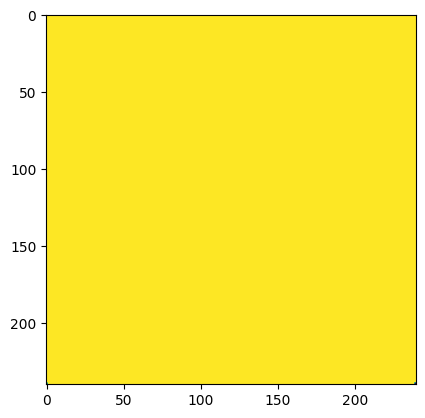

In [156]:
plot_image(res.cpu().squeeze(), channel=2)

In [160]:
res.squeeze()[1:4].max()

tensor(6.4553e-07, device='cuda:0')